# 5.3 イメージを対象とした多値分類

In [1]:
# 日本語化ライブラリ導入
!pip install japanize-matplotlib | tail -n 1

In [2]:
# 共通事前処理

# 余分なワーニングを非表示にする
import warnings
warnings.filterwarnings('ignore')

# 必要ライブラリのimport
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# matplotlib日本語化対応
import japanize_matplotlib

# データフレーム表示用関数
from IPython.display import display

# 表示オプション調整
# データフレームですべての項目を表示
pd.set_option("display.max_columns",None)
# numpyの浮動小数点の表示精度
np.set_printoptions(suppress=True, precision=4)
# データフレームでの表示精度
pd.options.display.float_format = '{:.4f}'.format
# グラフのデフォルトフォント指定
plt.rcParams["font.size"] = 14

# 乱数の種
random_seed = 123

In [3]:
# 混同行列表示用関数

def make_cm(matrix, columns):
    # matrix numpy配列
    
    # columns 項目名リスト
    n = len(columns)
    
    # '正解データ'をn回繰り返すリスト生成
    act = ['正解データ'] * n
    pred = ['予測結果'] * n
    
    #データフレーム生成
    cm = pd.DataFrame(matrix, 
        columns=[pred, columns], index=[act, columns])
    return cm

## (1) データ読み込み

In [4]:
# データロード

# 手書き数字データ
# 時間がかかるので注意して下さい
from sklearn.datasets import fetch_openml
mnist = fetch_openml('mnist_784', version=1,)

In [5]:
# イメージの設定
image = mnist.data

# 正解データの設定
label = mnist.target

# 文字列を整数値に変換
y = label.astype(np.int)

In [6]:
# データ詳細説明

print(mnist.DESCR)

**Author**: Yann LeCun, Corinna Cortes, Christopher J.C. Burges  
**Source**: [MNIST Website](http://yann.lecun.com/exdb/mnist/) - Date unknown  
**Please cite**:  

The MNIST database of handwritten digits with 784 features, raw data available at: http://yann.lecun.com/exdb/mnist/. It can be split in a training set of the first 60,000 examples, and a test set of 10,000 examples  

It is a subset of a larger set available from NIST. The digits have been size-normalized and centered in a fixed-size image. It is a good database for people who want to try learning techniques and pattern recognition methods on real-world data while spending minimal efforts on preprocessing and formatting. The original black and white (bilevel) images from NIST were size normalized to fit in a 20x20 pixel box while preserving their aspect ratio. The resulting images contain grey levels as a result of the anti-aliasing technique used by the normalization algorithm. the images were centered in a 28x28 image b

## (2) データ確認

In [7]:
# 配列サイズ確認
print("画像データ数:", image.shape)
print("ラベルデータ数:", y.shape)

画像データ数: (70000, 784)
ラベルデータ数: (70000,)


In [8]:
# labelとyの内容確認
print(label[:10])
print(y[:10])

['5' '0' '4' '1' '9' '2' '1' '3' '1' '4']
[5 0 4 1 9 2 1 3 1 4]


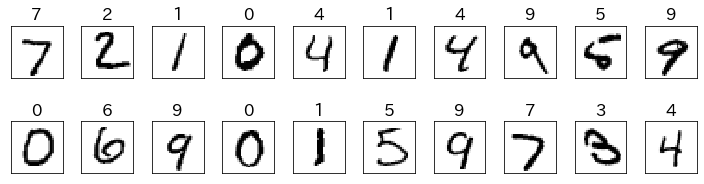

In [9]:
# 検証データ先頭20個のイメージ表示

# サイズ指定
plt.figure(figsize=(10, 3))

# 20個のイメージを表示
for i in range(20): 
    
    # i 番目のaxオブジェクト取得
    ax = plt.subplot(2, 10, i+1)
    
    # i番目のイメージデータ取得
    img = image[60000+i].reshape(28,28)
    
    # imgをイメージ表示
    ax.imshow(img, cmap='gray_r')
    
    # 正解データをタイトル表示
    ax.set_title(label[60000+i])
    
    # x, y目盛非表示
    ax.set_xticks([])
    ax.set_yticks([])
    
# 隣接画像同士がぶつからないようにする
plt.tight_layout()

# 表示
plt.show() 

## (3) データ前処理

In [10]:
# 処理前

# (最初の方の値は全部0なので、0以外の値の部分を抽出)
print(image[0,175:185])

[  0.  30.  36.  94. 154. 170. 253. 253. 253. 253.]


In [11]:
# 正規化(normalization)

# 入力項目の値を0から1までの範囲とする
# NumPyのブロードキャスト機能を利用
x = image / 255.0

In [12]:
# 結果確認

print(x[0,175:185])

[0.     0.1176 0.1412 0.3686 0.6039 0.6667 0.9922 0.9922 0.9922 0.9922]


## (4) データ分割

In [13]:
# 訓練データと検証データに分割
# 事前にシャッフル済みなので、先頭60000行を訓練データとする。
x_train = x[:60000,:]
x_test = x[60000:,:]
y_train = y[:60000]
y_test = y[60000:]

In [14]:
# 結果確認
print("学習画像データ数:", x_train.shape)
print("学習正解データ数:", y_train.shape)
print("検証画像データ数:", x_test.shape)
print("検証正解データ数:", y_test.shape)

学習画像データ数: (60000, 784)
学習正解データ数: (60000,)
検証画像データ数: (10000, 784)
検証正解データ数: (10000,)


## (5) アルゴリズム選定

In [15]:
# アルゴリズム選定

# サポートベクターマシンを利用する
from sklearn.svm import SVC
algorism = SVC(random_state=random_seed)

## (6) 学習
処理に相当の時間がかかります(7分程度)

In [16]:
# 学習
import time
start = time.time() 
algorism.fit(x_train, y_train)
end = time.time()
elapsed = end - start
print(f'学習時間 {elapsed:.4f}秒')

学習時間 481.1513秒


 ## (7) 予測

処理に相当の時間がかかります(2分程度)

In [17]:
# 予測
import time
start = time.time() 
y_pred = algorism.predict(x_test)
end = time.time()
elapsed = end - start
print(f'予測時間 {elapsed:.4f}秒')

予測時間 132.4490秒


## (8) 評価

In [18]:
# 混同行列表示
from sklearn.metrics import confusion_matrix
labels = range(10)
cm = confusion_matrix(y_test, y_pred, labels)
labels_str =  np.array(labels).astype(str)
cm_labeled = make_cm(cm, labels_str)
display(cm_labeled)

予測結果                                               
           0     1     2    3    4    5    6    7    8    9
正解データ 0  973     0     1    0    0    2    1    1    2    0
      1    0  1126     3    1    0    1    1    1    2    0
      2    6     1  1006    2    1    0    2    7    6    1
      3    0     0     2  995    0    2    0    5    5    1
      4    0     0     5    0  961    0    3    0    2   11
      5    2     0     0    9    0  871    4    1    4    1
      6    6     2     0    0    2    3  944    0    1    0
      7    0     6    11    1    1    0    0  996    2   11
      8    3     0     2    6    3    2    2    3  950    3
      9    3     4     1    7   10    2    1    7    4  970

In [19]:
# 適合率・再現率・F値表示
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred, digits=4))

              precision    recall  f1-score   support

           0     0.9799    0.9929    0.9863       980
           1     0.9886    0.9921    0.9903      1135
           2     0.9758    0.9748    0.9753      1032
           3     0.9745    0.9851    0.9798      1010
           4     0.9826    0.9786    0.9806       982
           5     0.9864    0.9765    0.9814       892
           6     0.9854    0.9854    0.9854       958
           7     0.9755    0.9689    0.9722      1028
           8     0.9714    0.9754    0.9734       974
           9     0.9719    0.9613    0.9666      1009

    accuracy                         0.9792     10000
   macro avg     0.9792    0.9791    0.9791     10000
weighted avg     0.9792    0.9792    0.9792     10000



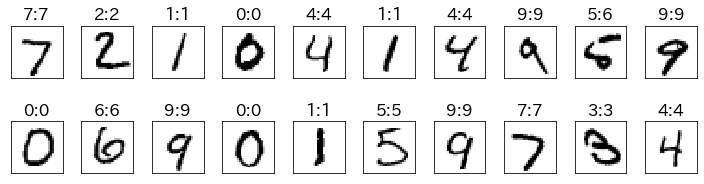

In [20]:
image_test = x_test * 255.0

# イメージ表示
plt.figure(figsize=(10, 3))

for i in range(20): 
    # i 番目のaxオブジェクト取得
    ax = plt.subplot(2, 10, i+1)
    
    # i番目のイメージデータ取得
    img = image_test[i].reshape(28,28)
    
    # imgをイメージ表示
    ax.imshow(img, cmap='gray_r')
    
    # (正解データ):(予測結果)をタイトル表示
    title = f'{y_test[i]}:{y_pred[i]}'
    ax.set_title(title)
    
    # x, y目盛非表示
    ax.set_xticks([])
    ax.set_yticks([])

# 隣接オブジェクトとぶつからないようにする
plt.tight_layout()

# 表示
plt.show()     

## (9) チューニング
Kerasをフレームワークとして使ったディープラーニングモデルを作り、精度を比較します。

In [21]:
import tensorflow as tf
import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten
from tensorflow.keras.layers import Conv2D, MaxPooling2D
from keras import backend as K

batch_size = 128
num_classes = 10
epochs = 12
pixel_size = 28

Using TensorFlow backend.


In [22]:
# ディープラーニング用に入力データの整形

# 訓練用データ
x_train_tf = x_train.reshape(x_train.shape[0], 
    pixel_size, pixel_size, 1)

# 検証用データ
x_test_tf = x_test.reshape(x_test.shape[0], 
    pixel_size, pixel_size, 1)

# 入力データ形式
input_shape = x_train_tf.shape[1:]

# 結果確認
print(input_shape)

(28, 28, 1)


In [23]:
# ディープラーニングモデルの作成
model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3),
                 activation='relu',
                 input_shape=input_shape))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes, activation='softmax'))

Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor


In [24]:
# 損失関数・精度・学習法の指定

# 損失関数
loss = tf.keras.losses.SparseCategoricalCrossentropy()

# 精度
acc = tf.keras.metrics.SparseCategoricalAccuracy()

# 学習法
optim = tf.keras.optimizers.Adam()

# モデルと結合
model.compile(optimizer=optim, loss=loss, metrics=[acc])

## 学習
処理時間  
約30分(GPUなし)  
約1分(GPUあり)


In [25]:
# 学習
model.fit(x_train_tf, y_train,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1,
          validation_data=(x_test_tf, y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/12
60000/60000 [==============================] - 162s 3ms/sample - loss: 0.2425 - sparse_categorical_accuracy: 0.9261 - val_loss: 0.0548 - val_sparse_categorical_accuracy: 0.9815
Epoch 2/12
60000/60000 [==============================] - 161s 3ms/sample - loss: 0.0853 - sparse_categorical_accuracy: 0.9746 - val_loss: 0.0358 - val_sparse_categorical_accuracy: 0.9874
Epoch 3/12
60000/60000 [==============================] - 169s 3ms/sample - loss: 0.0641 - sparse_categorical_accuracy: 0.9808 - val_loss: 0.0349 - val_sparse_categorical_accuracy: 0.9884
Epoch 4/12
60000/60000 [==============================] - 162s 3ms/sample - loss: 0.0533 - sparse_categorical_accuracy: 0.9837 - val_loss: 0.0310 - val_sparse_categorical_accuracy: 0.9894
Epoch 5/12
60000/60000 [==============================] - 165s 3ms/sample - loss: 0.0440 - sparse_categorical_accuracy: 0.9858 - val_loss: 0.0273 - val_sparse_categorical_accuracy: 0.9914
Epoch 6/12

## 予測・評価

In [26]:
# 予測結果取得
y_pred_tf = np.argmax(model.predict(x_test_tf), axis=-1)

In [27]:
# 混同行列表示
cm2 = confusion_matrix(y_test, y_pred_tf, labels)
cm2_labeled = make_cm(cm2, labels_str)
display(cm2_labeled)

予測結果                                                 
           0     1     2     3    4    5    6     7    8    9
正解データ 0  979     0     0     1    0    0    0     0    0    0
      1    0  1135     0     0    0    0    0     0    0    0
      2    1     2  1021     1    0    0    0     6    1    0
      3    0     0     0  1005    0    3    0     1    1    0
      4    0     0     0     0  976    0    2     0    1    3
      5    2     0     0     5    0  881    2     0    1    1
      6    4     2     0     0    1    1  949     0    1    0
      7    0     3     3     0    0    0    0  1020    1    1
      8    2     1     2     2    0    0    0     1  965    1
      9    0     0     0     0    5    5    0     5    5  989

In [28]:
# Presicion, Recall, F1値表示
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred_tf, digits=4))

              precision    recall  f1-score   support

           0     0.9909    0.9990    0.9949       980
           1     0.9930    1.0000    0.9965      1135
           2     0.9951    0.9893    0.9922      1032
           3     0.9911    0.9950    0.9931      1010
           4     0.9939    0.9939    0.9939       982
           5     0.9899    0.9877    0.9888       892
           6     0.9958    0.9906    0.9932       958
           7     0.9874    0.9922    0.9898      1028
           8     0.9887    0.9908    0.9897       974
           9     0.9940    0.9802    0.9870      1009

    accuracy                         0.9920     10000
   macro avg     0.9920    0.9919    0.9919     10000
weighted avg     0.9920    0.9920    0.9920     10000



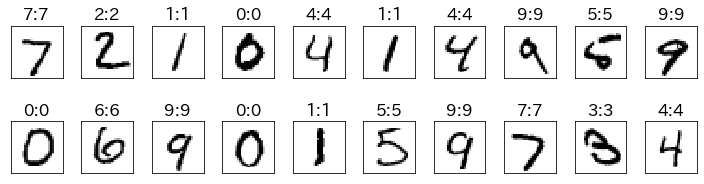

In [29]:
# イメージ表示
plt.figure(figsize=(10, 3))

for i in range(20): 
    # i 番目のaxオブジェクト取得
    ax = plt.subplot(2, 10, i+1)
    
    # i番目のイメージデータ取得
    img = image_test[i].reshape(28,28)
    
    # imgをイメージ表示
    ax.imshow(img, cmap='gray_r')
    
    # (正解データ):(予測結果)をタイトル表示
    title = f'{y_test[i]}:{y_pred_tf[i]}'
    ax.set_title(title)
    
    # x, y目盛非表示
    ax.set_xticks([])
    ax.set_yticks([])

# 隣接オブジェクトとぶつからないようにする
plt.tight_layout()

# 表示
plt.show()         

### コラム　テキスト分析

In [ ]:
!pip install janome

In [37]:
from janome.tokenizer import Tokenizer
t = Tokenizer()
text = '日本語をAIで扱うには、形態素解析処理が必須です。'
tokens = t.tokenize(text, wakati=True)
print(tokens)

['日本語', 'を', 'AI', 'で', '扱う', 'に', 'は', '、', '形態素', '解析', '処理', 'が', '必須', 'です', '。']


In [38]:
s = set(tokens) # リストを集合に変換
l = list(s)  # 再度リストに戻す
l.sort()  # ソート
print(l)  # 結果確認

['AI', '、', '。', 'が', 'で', 'です', 'に', 'は', 'を', '処理', '形態素', '必須', '扱う', '日本語', '解析']


In [39]:
# リストから単語辞書を作成する
w2n = {}
for ind, word in enumerate(l):
    w2n[word] = ind
print(w2n)

{'AI': 0, '、': 1, '。': 2, 'が': 3, 'で': 4, 'です': 5, 'に': 6, 'は': 7, 'を': 8, '処理': 9, '形態素': 10, '必須': 11, '扱う': 12, '日本語': 13, '解析': 14}


In [41]:
# 辞書を使って単語を数値に変換
nums = [w2n[item] for item in tokens]
    
# 結果確認
print(nums)

[13, 8, 0, 4, 12, 6, 7, 1, 10, 14, 9, 3, 11, 5, 2]
